<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

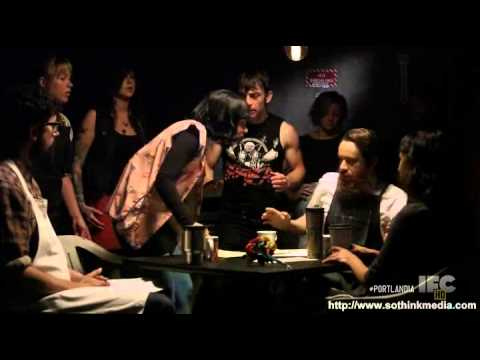

In [1]:
from IPython.display import YouTubeVideo


YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/Users/andyjohana/Documents/LAMBDA_2019/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [3]:
import pandas as pd

url = "./data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
shops.shape

(7616, 3)

In [5]:
shops['full_review_text'][0]

' 11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes!  I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas? '

In [6]:
def wrangle(df):
    df['full_review_text'] = df['full_review_text'].apply(lambda x: x.strip())
    df['date'] = df['full_review_text'].apply(lambda x: x.split()[0])
   
    # Remove dates from review text
    df['full_review_text'] = df['full_review_text'].apply(lambda x: ' '.join(x.split()[1:]))
    df['star_rating'] = df['star_rating'].apply(lambda x: x.split('.')[0]).astype('int')
    
    

In [7]:
wrangle(shops)

In [8]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,date
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5,11/25/2016
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4,12/2/2016
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4,11/30/2016
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Howe...,2,11/25/2016
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4,12/3/2016


In [9]:
import seaborn as sns
sns.countplot(x='star_rating', data=shops);

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [10]:

import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [11]:
shops['full_review_text']

0       1 check-in Love love loved the atmosphere! Eve...
1       Listed in Date Night: Austin, Ambiance in Aust...
2       1 check-in Listed in Brunch Spots I loved the ...
3       Very cool decor! Good drinks Nice seating Howe...
4       1 check-in They are located within the Northcr...
5       1 check-in Very cute cafe! I think from the mo...
6       2 check-ins Listed in "Nuptial Coffee Bliss!",...
7       2 check-ins Love this place! 5 stars for clean...
8       1 check-in Ok, let's try this approach... Pros...
9       3 check-ins This place has been shown on my so...
10      1 check-in Listed in Americano This is not you...
11      The store has A+ decoration, but honestly, the...
12      1 check-in Listed in 2016 - The Third Time is ...
13      This is such a cute little cafe! I've driven b...
14      Beautiful eccentric coffee shop with a library...
15      1 check-in Listed in In Search of Fantastic Co...
16      Really love the atmosphere here! I frequent co...
17      1 chec

In [12]:
tokens = []
# Create Pipe 

for doc in tokenizer.pipe(shops['full_review_text']):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [13]:
from collections import Counter
def count(docs):

    # Remember, shops['tokens'] has something like this
    # 0    [ , 11/25/2016, 1, check-in, Love, love, loved...
    # 1    [ , 12/2/2016, Listed, in, Date, Night:, Austi...
    # 2    [ , 11/30/2016, 1, check-in, Listed, in, Brunc...
    
        word_counts = Counter()
        appears_in = Counter()
        
        #length of dataframe 
        total_docs = len(docs) 

        #For each row in df['tokens']
        for doc in docs:
            
            word_counts.update(doc)
            appears_in.update(set(doc))
            #Sets are unordered.Set elements are unique. Duplicate elements are not allowed.
            #A set itself may be modified, but the elements contained in the set must be of an immutable type.

        #temp : zip asigna a key to each value
        #keys are the words and values the number of times a word appears
        temp = zip(word_counts.keys(), word_counts.values())
       
        #Create a data frame called wc with two columns word and count 
        wc = pd.DataFrame(temp, columns = ['word', 'count'])
        
        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        #cumsum() Return the cumulative sum of the elements along a given axis
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [14]:
wc = count(shops['tokens'])

In [15]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
7,coffee,4210,8058,1.0,0.020622,0.020622,0.552784
122,place,3029,4264,2.0,0.010912,0.031534,0.397715
95,great,2438,3250,3.0,0.008317,0.039851,0.320116
259,it's,2061,3117,4.0,0.007977,0.047828,0.270614
162,like,2034,2902,5.0,0.007427,0.055255,0.267069


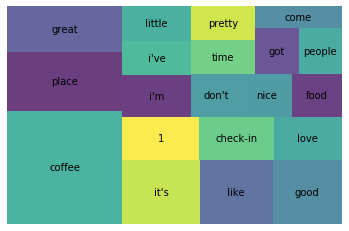

In [16]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [17]:
wc = count(shops['tokens'])

In [18]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
7,coffee,4210,8058,1.0,0.020622,0.020622,0.552784
122,place,3029,4264,2.0,0.010912,0.031534,0.397715
95,great,2438,3250,3.0,0.008317,0.039851,0.320116
259,it's,2061,3117,4.0,0.007977,0.047828,0.270614
162,like,2034,2902,5.0,0.007427,0.055255,0.267069


In [19]:
##ADD MORE WORDS
STOP_WORDS = nlp.Defaults.stop_words.union(["i've", "it's","i'm", "-", "don't", 'shop', '1', "check-in", 'coffee','coffee.'])

In [37]:
# nlp.Defaults.stop_words.union()

In [20]:
# from nltk.stem import PorterStemmer

# ps = PorterStemmer()


In [41]:
#STEMMING
def lemmas(df):
    
    sl = []
    doc = nlp(df)

    for token in doc: 
        if ((token.text not in STOP_WORDS) and (token.is_punct == False) and (token.pos_!= 'PRON') and(token.like_num == False)):
            sl.append(token.lemma_)

    return sl



In [42]:
shops['lemmas'] = shops['full_review_text'].apply(lemmas)

In [43]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,date,tokens,lemmas,review_rating
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5,11/25/2016,"[1, check-in, love, love, loved, atmosphere!, ...","[check, love, love, love, atmosphere, every, c...",good
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4,12/2/2016,"[listed, date, night:, austin,, ambiance, aust...","[list, Date, Night, Austin, Ambiance, Austin, ...",good
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4,11/30/2016,"[1, check-in, listed, brunch, spots, loved, ec...","[check, list, Brunch, Spots, love, eclectic, h...",good
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Howe...,2,11/25/2016,"[cool, decor!, good, drinks, nice, seating, ho...","[very, cool, decor, good, drink, nice, seating...",bad
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4,12/3/2016,"[1, check-in, located, northcross, mall, shopp...","[check, locate, Northcross, mall, shopping, ce...",good


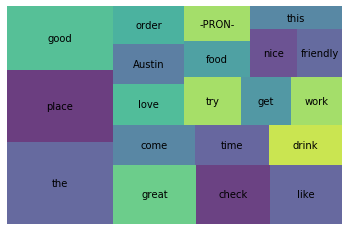

In [44]:
wc_stlm = count(shops['lemmas'])
wc_stlm_20 = wc_stlm[wc_stlm['rank'] <= 20]

squarify.plot(sizes=wc_stlm_20['pct_total'], label=wc_stlm_20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [45]:
wc_stlm.head(3)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
128,the,3945,6915,1.0,0.018756,0.018756,0.517988
115,place,3879,6026,2.0,0.016345,0.035101,0.509322
173,good,3590,5393,3.0,0.014628,0.049729,0.471376


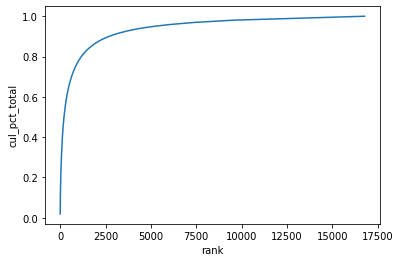

In [46]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc_stlm);

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [47]:
shops['review_rating'] = shops['star_rating'].replace({1:'bad', 2:'bad', 3:'bad', 4:'good', 5:'good'})

In [48]:
# Separate good reviews from bad reviews
good = count(shops[shops['review_rating'] == 'good']['lemmas'])
bad = count(shops[shops['review_rating'] == 'bad']['lemmas'])

In [49]:
good.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
128,the,3134,5434,1.0,0.018869,0.018869,0.510423
115,place,3125,4797,2.0,0.016657,0.035526,0.508958
206,good,2948,4400,3.0,0.015279,0.050805,0.480130
87,great,2497,3459,4.0,0.012011,0.062816,0.406678
24,check,2686,2940,5.0,0.010209,0.073024,0.437459
188,like,1677,2434,6.0,0.008452,0.081476,0.273127
20,love,1590,2089,7.0,0.007254,0.088730,0.258958
384,come,1481,1988,8.0,0.006903,0.095633,0.241205
52,Austin,1543,1986,9.0,0.006896,0.102529,0.251303
389,time,1344,1775,10.0,0.006163,0.108693,0.218893


In [50]:
bad.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
136,the,811,1481,1.0,0.018353,0.018353,0.549458
8,place,754,1229,2.0,0.015230,0.033583,0.510840
22,good,642,993,3.0,0.012306,0.045889,0.434959
6,like,596,945,4.0,0.011711,0.057600,0.403794
106,order,431,764,5.0,0.009468,0.067067,0.292005
40,come,452,651,6.0,0.008067,0.075135,0.306233
39,drink,363,611,7.0,0.007572,0.082706,0.245935
470,time,419,607,8.0,0.007522,0.090229,0.283875
56,check,489,527,9.0,0.006531,0.096759,0.331301
150,food,321,499,10.0,0.006184,0.102943,0.217480


In [51]:
# Get top 15 words used in good reviews
good_15 = good[good['rank'] <= 15]

In [52]:
# Get top 15 words used in bad reviews
bad_15 = bad[bad['rank'] <= 15]

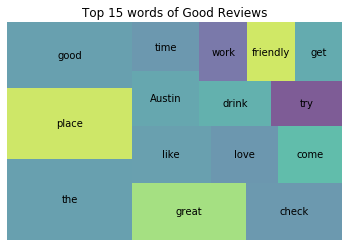

In [53]:
squarify.plot(sizes=good_15['pct_total'], label=good_15['word'], alpha=0.7)
plt.title('Top 15 words of Good Reviews')
plt.axis('off')
plt.show()

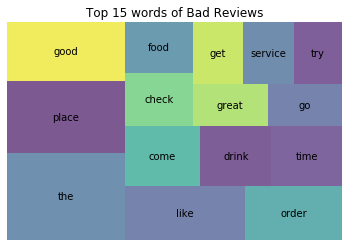

In [54]:
squarify.plot(sizes=bad_15['pct_total'], label=bad_15['word'], alpha=0.7)
plt.title('Top 15 words of Bad Reviews')
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

